<a href="https://colab.research.google.com/github/Pavan7248/IPL-EDA/blob/main/Heart_Disease_Diagnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project on Heart Disease Diagnostic Analysis.**



# 1. Preparing Data for Exploration

Importing Python Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

Reading Dataset

In [2]:
#Load dataset
heart_data = pd.read_csv('/content/Heart Disease data.csv')

# 2. Analyzing Dataset

In [3]:
# Display the first few rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The dataset contains various features related to heart disease diagnosis, such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol level (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), oldpeak (ST depression induced by exercise relative to rest), slope of the peak exercise ST segment (slope), number of major vessels colored by fluoroscopy (ca), thalassemia (thal), and the target variable (target) indicating the presence of heart disease.

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
heart_data.shape

(1025, 14)

In [10]:
# Summary statistics of the dataset
summary_stats = heart_data.describe(include='all')

# Check for missing values
missing_values = heart_data.isnull().sum()

summary_stats, missing_values


(               age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000   
 25%      48.000000     0.000000     0.000000   120.000000   211.00000   
 50%      56.000000     1.000000     1.000000   130.000000   240.00000   
 75%      61.000000     1.000000     2.000000   140.000000   275.00000   
 max      77.000000     1.000000     3.000000   200.000000   564.00000   
 
                fbs      restecg      thalach        exang      oldpeak  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
 mean      0.149268     0.529756   149.114146     0.336585     1.071512   
 std       0.356527     0.527878    23.005724     0.472772     1.175053   
 min       0.000000     0.000000

## Summary


1.   The Dataset has 1025 entries.
2.   The target variable indicates the presence of heart disease (1 for presence, 0 for absence).
3.   No missing Values in the dataset.



<ipython-input-12-3dafb8c46d4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=heart_data, palette='Set2')


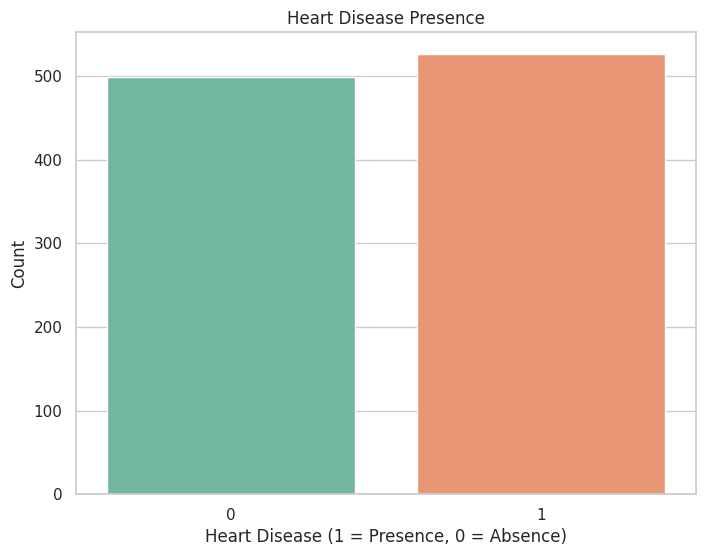

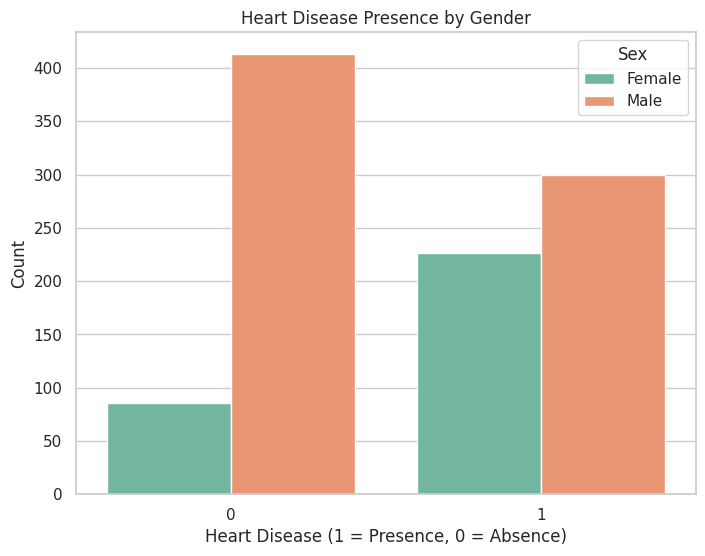

In [12]:
# Overall heart disease rate
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=heart_data, palette='Set2')
plt.title('Heart Disease Presence')
plt.xlabel('Heart Disease (1 = Presence, 0 = Absence)')
plt.ylabel('Count')
plt.show()

# Heart disease rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='sex', data=heart_data, palette='Set2')
plt.title('Heart Disease Presence by Gender')
plt.xlabel('Heart Disease (1 = Presence, 0 = Absence)')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()

# The Visualization show:



1.   Nearly equal distribution of heart disease presence (1) and absence (0).
2.   Males (sex = 1) have a higher count of heart disease presence compared to females (sex = 0)



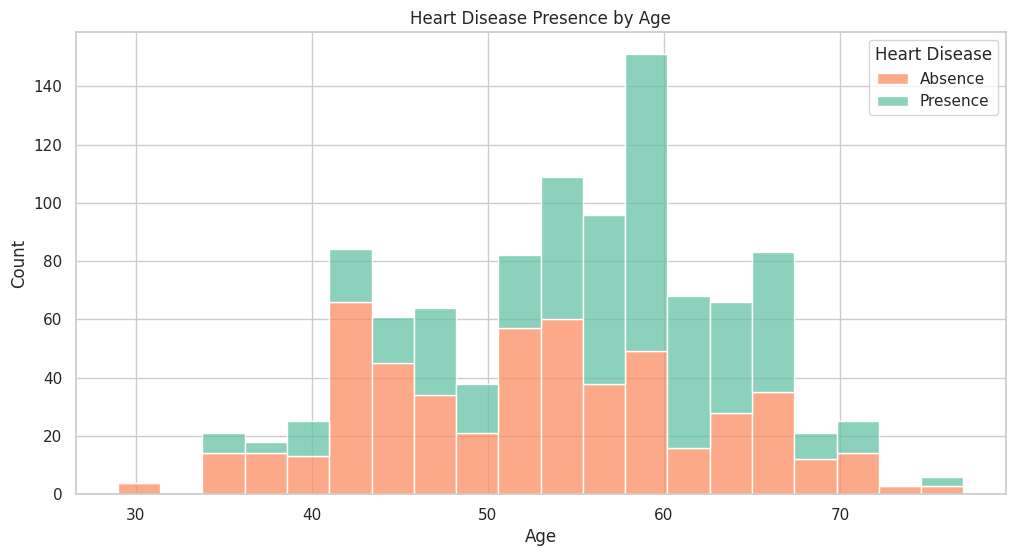

In [13]:
# Heart disease presence by age
plt.figure(figsize=(12, 6))
sns.histplot(data=heart_data, x='age', hue='target', multiple='stack', palette='Set2', bins=20)
plt.title('Heart Disease Presence by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absence', 'Presence'])
plt.show()


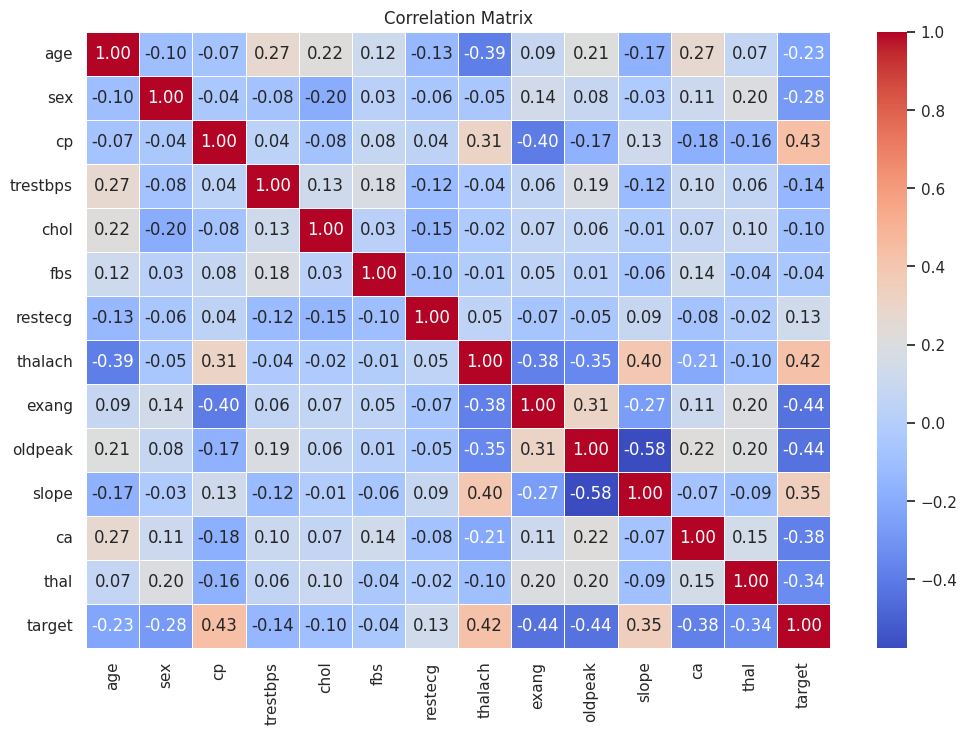

In [16]:
# Compute the correlation matrix
corr_matrix = heart_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


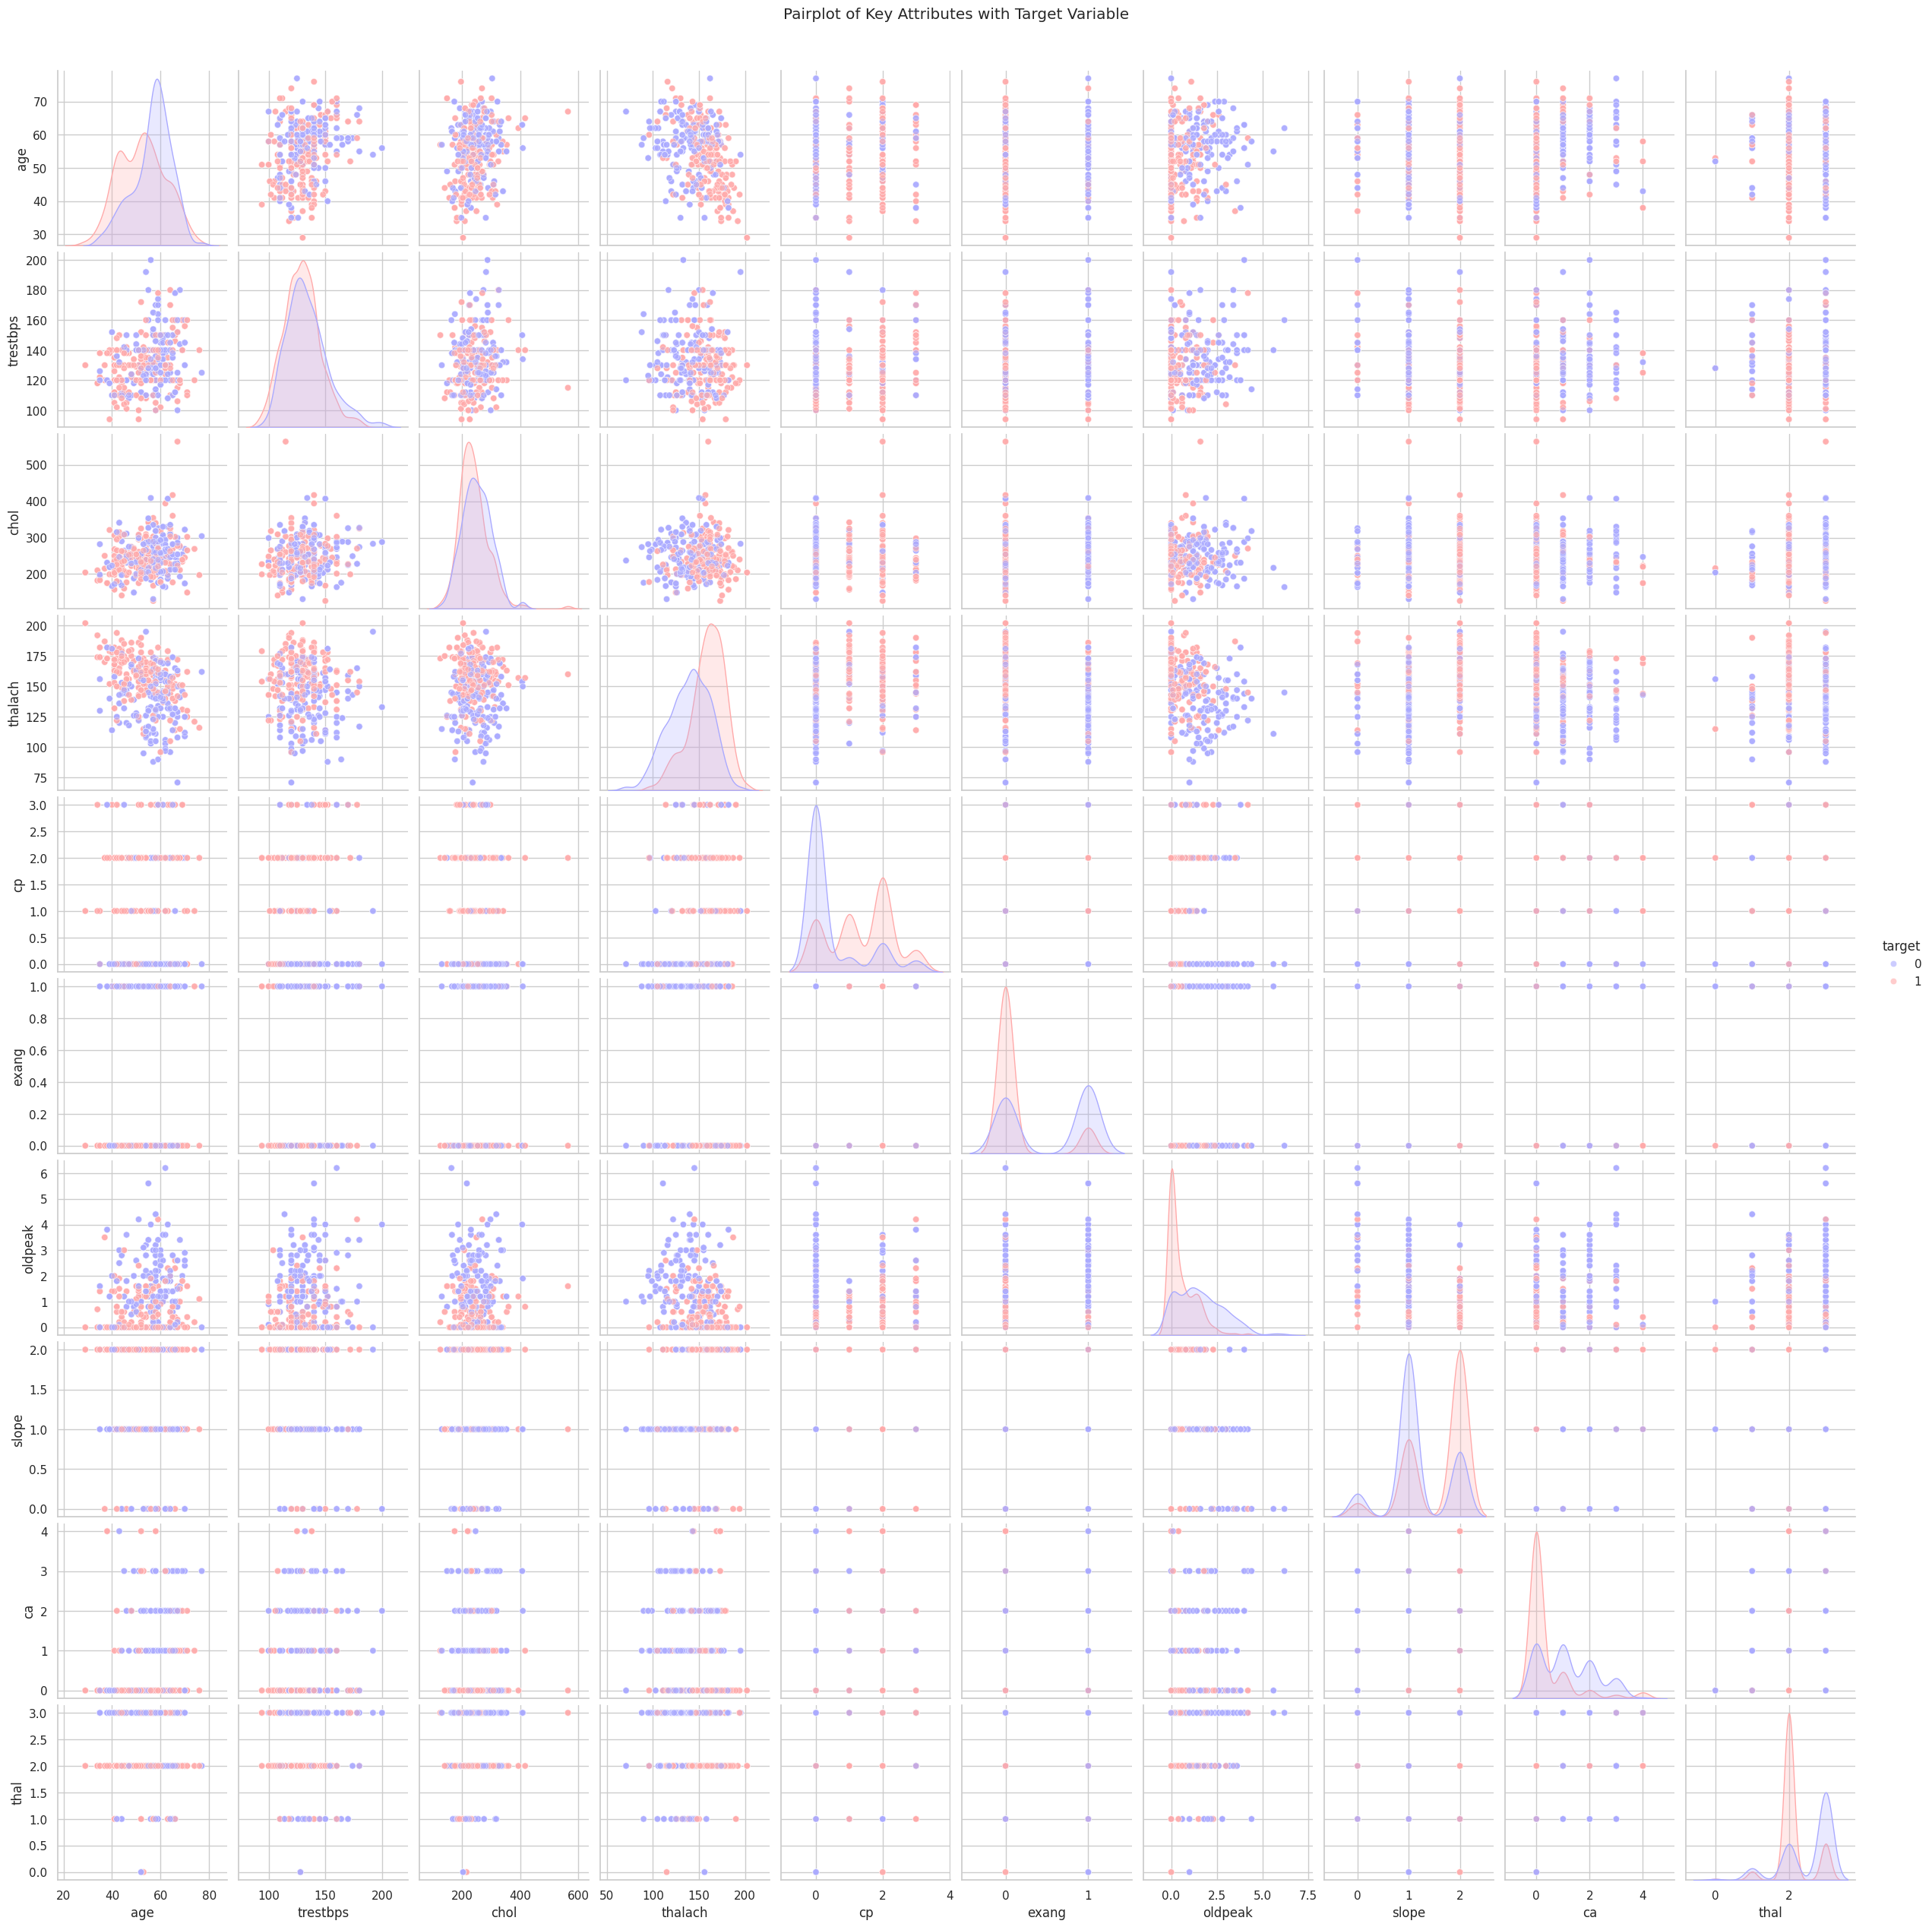

In [17]:
# Create pair plots to visualize the relationships between key attributes and the presence of heart disease
pairplot_attributes = ['age', 'trestbps', 'chol', 'thalach', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# Create a pairplot
sns.pairplot(heart_data[pairplot_attributes], hue='target', palette='bwr', diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot of Key Attributes with Target Variable', y=1.02)
plt.show()
